In [1]:
from scripts.utils import get_device
from scripts.train_model import train_model
from scripts.test_model import test_model
from scripts.utils import convert_to_color_

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report as score

import torch

## Проверяем доступность GPU для вычислений

In [2]:
torch.cuda.is_available()

True

## Задаем параметры запуска


In [7]:
DATASET_PATH: str = 'data/coffee/' # путь до папки с данными
IMG_NAME: str = 'triple_coffee.mat' # название .mat файла с гиперспектральным изображением (ключ по умолчанию 'image')
GT_NAME: str = 'triple_coffee_mask.mat' # название .mat файла с маской (ключ по умолчанию 'img')
WEIGHTS_PATH: str = 'checkpoints/short_he/he/2022_04_19_14_57_26_epoch9_0.84.pth' # путь до файла с весами (опционально)
SAMPLE_PERCENTAGE: float = 0.01 # размер тренировочной выборки из куба
CUDA_DEVICE = get_device(0) # подключение к доступному GPU, иначе подключается CPU

Computation on CUDA GPU device 0


## Задаем гиперпараметры для сети

In [8]:
# Список классов в .mat файле (TODO надо бы вынести в mat файл)
LABEL_VALUES = [
        "Undefined",
        "background",
        "c1",
        "c2",
        "c3",
        "c4",
    ]
# Указываем количество эпох, классов и устройство для вычисления
hyperparams = {
        'epoch': 5,
        'n_classes': len(LABEL_VALUES),
        'device': CUDA_DEVICE
    }

## Вызов обучения сети

In [9]:
train_model(dataset_path=DATASET_PATH,
                img_name=IMG_NAME,
                gt_name=GT_NAME,
                sample_percentage=SAMPLE_PERCENTAGE,
                LABEL_VALUES=LABEL_VALUES,
                hyperparams=hyperparams)

(1368000,)
(916560,)


  0%|                                                                                            | 0/5 [00:06<?, ?it/s]

Train (epoch 1/5) [3960/605800 (1%)]	Loss: 3.156009


  0%|                                                                                            | 0/5 [00:12<?, ?it/s]

Train (epoch 1/5) [7960/605800 (1%)]	Loss: 0.978467


  0%|                                                                                            | 0/5 [00:18<?, ?it/s]

Train (epoch 1/5) [11960/605800 (2%)]	Loss: 0.818642


  0%|                                                                                            | 0/5 [00:25<?, ?it/s]

Train (epoch 1/5) [15960/605800 (3%)]	Loss: 0.713676


  0%|                                                                                            | 0/5 [00:31<?, ?it/s]

Train (epoch 1/5) [19960/605800 (3%)]	Loss: 0.634281


  0%|                                                                                            | 0/5 [00:38<?, ?it/s]

Train (epoch 1/5) [23960/605800 (4%)]	Loss: 0.616319


  0%|                                                                                            | 0/5 [00:44<?, ?it/s]

Train (epoch 1/5) [27960/605800 (5%)]	Loss: 0.626265


  0%|                                                                                            | 0/5 [00:50<?, ?it/s]

Train (epoch 1/5) [31960/605800 (5%)]	Loss: 0.625145


  0%|                                                                                            | 0/5 [00:56<?, ?it/s]

Train (epoch 1/5) [35960/605800 (6%)]	Loss: 0.624799


  0%|                                                                                            | 0/5 [01:02<?, ?it/s]

Train (epoch 1/5) [39960/605800 (7%)]	Loss: 0.586763


  0%|                                                                                            | 0/5 [01:09<?, ?it/s]

Train (epoch 1/5) [43960/605800 (7%)]	Loss: 0.585574


  0%|                                                                                            | 0/5 [01:15<?, ?it/s]

Train (epoch 1/5) [47960/605800 (8%)]	Loss: 0.551528


  0%|                                                                                            | 0/5 [01:21<?, ?it/s]

Train (epoch 1/5) [51960/605800 (9%)]	Loss: 0.566750


  0%|                                                                                            | 0/5 [01:27<?, ?it/s]

Train (epoch 1/5) [55960/605800 (9%)]	Loss: 0.582432


  0%|                                                                                            | 0/5 [01:34<?, ?it/s]

Train (epoch 1/5) [59960/605800 (10%)]	Loss: 0.549655


  0%|                                                                                            | 0/5 [01:40<?, ?it/s]

Train (epoch 1/5) [63960/605800 (11%)]	Loss: 0.559841


  0%|                                                                                            | 0/5 [01:46<?, ?it/s]

Train (epoch 1/5) [67960/605800 (11%)]	Loss: 0.573835


  0%|                                                                                            | 0/5 [01:52<?, ?it/s]

Train (epoch 1/5) [71960/605800 (12%)]	Loss: 0.560199


  0%|                                                                                            | 0/5 [01:59<?, ?it/s]

Train (epoch 1/5) [75960/605800 (13%)]	Loss: 0.547897


  0%|                                                                                            | 0/5 [02:05<?, ?it/s]

Train (epoch 1/5) [79960/605800 (13%)]	Loss: 0.541763


  0%|                                                                                            | 0/5 [02:11<?, ?it/s]

Train (epoch 1/5) [83960/605800 (14%)]	Loss: 0.561645


  0%|                                                                                            | 0/5 [02:17<?, ?it/s]

Train (epoch 1/5) [87960/605800 (15%)]	Loss: 0.554960


  0%|                                                                                            | 0/5 [02:23<?, ?it/s]

Train (epoch 1/5) [91960/605800 (15%)]	Loss: 0.539339


  0%|                                                                                            | 0/5 [02:30<?, ?it/s]

Train (epoch 1/5) [95960/605800 (16%)]	Loss: 0.540418


  0%|                                                                                            | 0/5 [02:36<?, ?it/s]

Train (epoch 1/5) [99960/605800 (17%)]	Loss: 0.526236


  0%|                                                                                            | 0/5 [02:42<?, ?it/s]

Train (epoch 1/5) [103960/605800 (17%)]	Loss: 0.540056


  0%|                                                                                            | 0/5 [02:48<?, ?it/s]

Train (epoch 1/5) [107960/605800 (18%)]	Loss: 0.543061


  0%|                                                                                            | 0/5 [02:55<?, ?it/s]

Train (epoch 1/5) [111960/605800 (18%)]	Loss: 0.545213


  0%|                                                                                            | 0/5 [03:01<?, ?it/s]

Train (epoch 1/5) [115960/605800 (19%)]	Loss: 0.538598


  0%|                                                                                            | 0/5 [03:07<?, ?it/s]

Train (epoch 1/5) [119960/605800 (20%)]	Loss: 0.520691


  0%|                                                                                            | 0/5 [03:13<?, ?it/s]

Train (epoch 1/5) [123960/605800 (20%)]	Loss: 0.542101


  0%|                                                                                            | 0/5 [03:20<?, ?it/s]

Train (epoch 1/5) [127960/605800 (21%)]	Loss: 0.531626


  0%|                                                                                            | 0/5 [03:26<?, ?it/s]

Train (epoch 1/5) [131960/605800 (22%)]	Loss: 0.536562


  0%|                                                                                            | 0/5 [03:32<?, ?it/s]

Train (epoch 1/5) [135960/605800 (22%)]	Loss: 0.524825


  0%|                                                                                            | 0/5 [03:38<?, ?it/s]

Train (epoch 1/5) [139960/605800 (23%)]	Loss: 0.521841


  0%|                                                                                            | 0/5 [03:45<?, ?it/s]

Train (epoch 1/5) [143960/605800 (24%)]	Loss: 0.516699


  0%|                                                                                            | 0/5 [03:51<?, ?it/s]

Train (epoch 1/5) [147960/605800 (24%)]	Loss: 0.530533


  0%|                                                                                            | 0/5 [03:58<?, ?it/s]

Train (epoch 1/5) [151960/605800 (25%)]	Loss: 0.514209


  0%|                                                                                            | 0/5 [04:04<?, ?it/s]

Train (epoch 1/5) [155960/605800 (26%)]	Loss: 0.525101


  0%|                                                                                            | 0/5 [04:10<?, ?it/s]

Train (epoch 1/5) [159960/605800 (26%)]	Loss: 0.506362


  0%|                                                                                            | 0/5 [04:17<?, ?it/s]

Train (epoch 1/5) [163960/605800 (27%)]	Loss: 0.520224


  0%|                                                                                            | 0/5 [04:23<?, ?it/s]

Train (epoch 1/5) [167960/605800 (28%)]	Loss: 0.509522


  0%|                                                                                            | 0/5 [04:29<?, ?it/s]

Train (epoch 1/5) [171960/605800 (28%)]	Loss: 0.498400


  0%|                                                                                            | 0/5 [04:35<?, ?it/s]

Train (epoch 1/5) [175960/605800 (29%)]	Loss: 0.497763


  0%|                                                                                            | 0/5 [04:41<?, ?it/s]

Train (epoch 1/5) [179960/605800 (30%)]	Loss: 0.508286


  0%|                                                                                            | 0/5 [04:47<?, ?it/s]

Train (epoch 1/5) [183960/605800 (30%)]	Loss: 0.518555


  0%|                                                                                            | 0/5 [04:54<?, ?it/s]

Train (epoch 1/5) [187960/605800 (31%)]	Loss: 0.502166


  0%|                                                                                            | 0/5 [05:00<?, ?it/s]

Train (epoch 1/5) [191960/605800 (32%)]	Loss: 0.513948


  0%|                                                                                            | 0/5 [05:06<?, ?it/s]

Train (epoch 1/5) [195960/605800 (32%)]	Loss: 0.521356


  0%|                                                                                            | 0/5 [05:13<?, ?it/s]

Train (epoch 1/5) [199960/605800 (33%)]	Loss: 0.518951


  0%|                                                                                            | 0/5 [05:19<?, ?it/s]

Train (epoch 1/5) [203960/605800 (34%)]	Loss: 0.502277


  0%|                                                                                            | 0/5 [05:26<?, ?it/s]

Train (epoch 1/5) [207960/605800 (34%)]	Loss: 0.485967


  0%|                                                                                            | 0/5 [05:32<?, ?it/s]

Train (epoch 1/5) [211960/605800 (35%)]	Loss: 0.512972


  0%|                                                                                            | 0/5 [05:39<?, ?it/s]

Train (epoch 1/5) [215960/605800 (36%)]	Loss: 0.502774


  0%|                                                                                            | 0/5 [05:45<?, ?it/s]

Train (epoch 1/5) [219960/605800 (36%)]	Loss: 0.504526


  0%|                                                                                            | 0/5 [05:51<?, ?it/s]

Train (epoch 1/5) [223960/605800 (37%)]	Loss: 0.505024


  0%|                                                                                            | 0/5 [05:57<?, ?it/s]

Train (epoch 1/5) [227960/605800 (38%)]	Loss: 0.510485


  0%|                                                                                            | 0/5 [06:04<?, ?it/s]

Train (epoch 1/5) [231960/605800 (38%)]	Loss: 0.499228


  0%|                                                                                            | 0/5 [06:10<?, ?it/s]

Train (epoch 1/5) [235960/605800 (39%)]	Loss: 0.498954


  0%|                                                                                            | 0/5 [06:16<?, ?it/s]

Train (epoch 1/5) [239960/605800 (40%)]	Loss: 0.502676


  0%|                                                                                            | 0/5 [06:22<?, ?it/s]

Train (epoch 1/5) [243960/605800 (40%)]	Loss: 0.484047


  0%|                                                                                            | 0/5 [06:28<?, ?it/s]

Train (epoch 1/5) [247960/605800 (41%)]	Loss: 0.480517


  0%|                                                                                            | 0/5 [06:34<?, ?it/s]

Train (epoch 1/5) [251960/605800 (42%)]	Loss: 0.513738


  0%|                                                                                            | 0/5 [06:41<?, ?it/s]

Train (epoch 1/5) [255960/605800 (42%)]	Loss: 0.493472


  0%|                                                                                            | 0/5 [06:47<?, ?it/s]

Train (epoch 1/5) [259960/605800 (43%)]	Loss: 0.492461


  0%|                                                                                            | 0/5 [06:53<?, ?it/s]

Train (epoch 1/5) [263960/605800 (44%)]	Loss: 0.485357


  0%|                                                                                            | 0/5 [06:59<?, ?it/s]

Train (epoch 1/5) [267960/605800 (44%)]	Loss: 0.507121


  0%|                                                                                            | 0/5 [07:05<?, ?it/s]

Train (epoch 1/5) [271960/605800 (45%)]	Loss: 0.497143


  0%|                                                                                            | 0/5 [07:12<?, ?it/s]

Train (epoch 1/5) [275960/605800 (46%)]	Loss: 0.488316


  0%|                                                                                            | 0/5 [07:18<?, ?it/s]

Train (epoch 1/5) [279960/605800 (46%)]	Loss: 0.500945


  0%|                                                                                            | 0/5 [07:24<?, ?it/s]

Train (epoch 1/5) [283960/605800 (47%)]	Loss: 0.487510


  0%|                                                                                            | 0/5 [07:30<?, ?it/s]

Train (epoch 1/5) [287960/605800 (48%)]	Loss: 0.482100


  0%|                                                                                            | 0/5 [07:37<?, ?it/s]

Train (epoch 1/5) [291960/605800 (48%)]	Loss: 0.488518


  0%|                                                                                            | 0/5 [07:43<?, ?it/s]

Train (epoch 1/5) [295960/605800 (49%)]	Loss: 0.493980


  0%|                                                                                            | 0/5 [07:49<?, ?it/s]

Train (epoch 1/5) [299960/605800 (50%)]	Loss: 0.475817


  0%|                                                                                            | 0/5 [07:55<?, ?it/s]

Train (epoch 1/5) [303960/605800 (50%)]	Loss: 0.490432


  0%|                                                                                            | 0/5 [08:02<?, ?it/s]

Train (epoch 1/5) [307960/605800 (51%)]	Loss: 0.481534


  0%|                                                                                            | 0/5 [08:08<?, ?it/s]

Train (epoch 1/5) [311960/605800 (51%)]	Loss: 0.477547


  0%|                                                                                            | 0/5 [08:14<?, ?it/s]

Train (epoch 1/5) [315960/605800 (52%)]	Loss: 0.476313


  0%|                                                                                            | 0/5 [08:20<?, ?it/s]

Train (epoch 1/5) [319960/605800 (53%)]	Loss: 0.500303


  0%|                                                                                            | 0/5 [08:26<?, ?it/s]

Train (epoch 1/5) [323960/605800 (53%)]	Loss: 0.483501


  0%|                                                                                            | 0/5 [08:33<?, ?it/s]

Train (epoch 1/5) [327960/605800 (54%)]	Loss: 0.501058


  0%|                                                                                            | 0/5 [08:39<?, ?it/s]

Train (epoch 1/5) [331960/605800 (55%)]	Loss: 0.473665


  0%|                                                                                            | 0/5 [08:45<?, ?it/s]

Train (epoch 1/5) [335960/605800 (55%)]	Loss: 0.487434


  0%|                                                                                            | 0/5 [08:51<?, ?it/s]

Train (epoch 1/5) [339960/605800 (56%)]	Loss: 0.513231


  0%|                                                                                            | 0/5 [08:58<?, ?it/s]

Train (epoch 1/5) [343960/605800 (57%)]	Loss: 0.503456


  0%|                                                                                            | 0/5 [09:04<?, ?it/s]

Train (epoch 1/5) [347960/605800 (57%)]	Loss: 0.478316


  0%|                                                                                            | 0/5 [09:10<?, ?it/s]

Train (epoch 1/5) [351960/605800 (58%)]	Loss: 0.466095


  0%|                                                                                            | 0/5 [09:17<?, ?it/s]

Train (epoch 1/5) [355960/605800 (59%)]	Loss: 0.494104


  0%|                                                                                            | 0/5 [09:23<?, ?it/s]

Train (epoch 1/5) [359960/605800 (59%)]	Loss: 0.490146


  0%|                                                                                            | 0/5 [09:29<?, ?it/s]

Train (epoch 1/5) [363960/605800 (60%)]	Loss: 0.480875


  0%|                                                                                            | 0/5 [09:35<?, ?it/s]

Train (epoch 1/5) [367960/605800 (61%)]	Loss: 0.496513


  0%|                                                                                            | 0/5 [09:41<?, ?it/s]

Train (epoch 1/5) [371960/605800 (61%)]	Loss: 0.466131


  0%|                                                                                            | 0/5 [09:48<?, ?it/s]

Train (epoch 1/5) [375960/605800 (62%)]	Loss: 0.478161


  0%|                                                                                            | 0/5 [09:54<?, ?it/s]

Train (epoch 1/5) [379960/605800 (63%)]	Loss: 0.478335


  0%|                                                                                            | 0/5 [10:00<?, ?it/s]

Train (epoch 1/5) [383960/605800 (63%)]	Loss: 0.496150


  0%|                                                                                            | 0/5 [10:06<?, ?it/s]

Train (epoch 1/5) [387960/605800 (64%)]	Loss: 0.464471


  0%|                                                                                            | 0/5 [10:13<?, ?it/s]

Train (epoch 1/5) [391960/605800 (65%)]	Loss: 0.472029


  0%|                                                                                            | 0/5 [10:19<?, ?it/s]

Train (epoch 1/5) [395960/605800 (65%)]	Loss: 0.491239


  0%|                                                                                            | 0/5 [10:25<?, ?it/s]

Train (epoch 1/5) [399960/605800 (66%)]	Loss: 0.462363


  0%|                                                                                            | 0/5 [10:31<?, ?it/s]

Train (epoch 1/5) [403960/605800 (67%)]	Loss: 0.480233


  0%|                                                                                            | 0/5 [10:38<?, ?it/s]

Train (epoch 1/5) [407960/605800 (67%)]	Loss: 0.481216


  0%|                                                                                            | 0/5 [10:44<?, ?it/s]

Train (epoch 1/5) [411960/605800 (68%)]	Loss: 0.465269


  0%|                                                                                            | 0/5 [10:50<?, ?it/s]

Train (epoch 1/5) [415960/605800 (69%)]	Loss: 0.472277


  0%|                                                                                            | 0/5 [10:56<?, ?it/s]

Train (epoch 1/5) [419960/605800 (69%)]	Loss: 0.465608


  0%|                                                                                            | 0/5 [11:02<?, ?it/s]

Train (epoch 1/5) [423960/605800 (70%)]	Loss: 0.486427


  0%|                                                                                            | 0/5 [11:09<?, ?it/s]

Train (epoch 1/5) [427960/605800 (71%)]	Loss: 0.480284


  0%|                                                                                            | 0/5 [11:15<?, ?it/s]

Train (epoch 1/5) [431960/605800 (71%)]	Loss: 0.483012


  0%|                                                                                            | 0/5 [11:21<?, ?it/s]

Train (epoch 1/5) [435960/605800 (72%)]	Loss: 0.474469


  0%|                                                                                            | 0/5 [11:27<?, ?it/s]

Train (epoch 1/5) [439960/605800 (73%)]	Loss: 0.470483


  0%|                                                                                            | 0/5 [11:34<?, ?it/s]

Train (epoch 1/5) [443960/605800 (73%)]	Loss: 0.468906


  0%|                                                                                            | 0/5 [11:40<?, ?it/s]

Train (epoch 1/5) [447960/605800 (74%)]	Loss: 0.465180


  0%|                                                                                            | 0/5 [11:46<?, ?it/s]

Train (epoch 1/5) [451960/605800 (75%)]	Loss: 0.466472


  0%|                                                                                            | 0/5 [11:52<?, ?it/s]

Train (epoch 1/5) [455960/605800 (75%)]	Loss: 0.453462


  0%|                                                                                            | 0/5 [11:59<?, ?it/s]

Train (epoch 1/5) [459960/605800 (76%)]	Loss: 0.476278


  0%|                                                                                            | 0/5 [12:05<?, ?it/s]

Train (epoch 1/5) [463960/605800 (77%)]	Loss: 0.462653


  0%|                                                                                            | 0/5 [12:11<?, ?it/s]

Train (epoch 1/5) [467960/605800 (77%)]	Loss: 0.464166


  0%|                                                                                            | 0/5 [12:17<?, ?it/s]

Train (epoch 1/5) [471960/605800 (78%)]	Loss: 0.455627


  0%|                                                                                            | 0/5 [12:23<?, ?it/s]

Train (epoch 1/5) [475960/605800 (79%)]	Loss: 0.487375


  0%|                                                                                            | 0/5 [12:30<?, ?it/s]

Train (epoch 1/5) [479960/605800 (79%)]	Loss: 0.479554


  0%|                                                                                            | 0/5 [12:36<?, ?it/s]

Train (epoch 1/5) [483960/605800 (80%)]	Loss: 0.469169


  0%|                                                                                            | 0/5 [12:43<?, ?it/s]

Train (epoch 1/5) [487960/605800 (81%)]	Loss: 0.451150


  0%|                                                                                            | 0/5 [12:49<?, ?it/s]

Train (epoch 1/5) [491960/605800 (81%)]	Loss: 0.465914


  0%|                                                                                            | 0/5 [12:56<?, ?it/s]

Train (epoch 1/5) [495960/605800 (82%)]	Loss: 0.456198


  0%|                                                                                            | 0/5 [13:02<?, ?it/s]

Train (epoch 1/5) [499960/605800 (83%)]	Loss: 0.463317


  0%|                                                                                            | 0/5 [13:08<?, ?it/s]

Train (epoch 1/5) [503960/605800 (83%)]	Loss: 0.466498


  0%|                                                                                            | 0/5 [13:15<?, ?it/s]

Train (epoch 1/5) [507960/605800 (84%)]	Loss: 0.467116


  0%|                                                                                            | 0/5 [13:21<?, ?it/s]

Train (epoch 1/5) [511960/605800 (85%)]	Loss: 0.462298


  0%|                                                                                            | 0/5 [13:27<?, ?it/s]

Train (epoch 1/5) [515960/605800 (85%)]	Loss: 0.465433


  0%|                                                                                            | 0/5 [13:33<?, ?it/s]

Train (epoch 1/5) [519960/605800 (86%)]	Loss: 0.460709


  0%|                                                                                            | 0/5 [13:40<?, ?it/s]

Train (epoch 1/5) [523960/605800 (86%)]	Loss: 0.463518


  0%|                                                                                            | 0/5 [13:46<?, ?it/s]

Train (epoch 1/5) [527960/605800 (87%)]	Loss: 0.478891


  0%|                                                                                            | 0/5 [13:52<?, ?it/s]

Train (epoch 1/5) [531960/605800 (88%)]	Loss: 0.467495


  0%|                                                                                            | 0/5 [13:58<?, ?it/s]

Train (epoch 1/5) [535960/605800 (88%)]	Loss: 0.474181


  0%|                                                                                            | 0/5 [14:04<?, ?it/s]

Train (epoch 1/5) [539960/605800 (89%)]	Loss: 0.451730


  0%|                                                                                            | 0/5 [14:11<?, ?it/s]

Train (epoch 1/5) [543960/605800 (90%)]	Loss: 0.467583


  0%|                                                                                            | 0/5 [14:17<?, ?it/s]

Train (epoch 1/5) [547960/605800 (90%)]	Loss: 0.460416


  0%|                                                                                            | 0/5 [14:23<?, ?it/s]

Train (epoch 1/5) [551960/605800 (91%)]	Loss: 0.458568


  0%|                                                                                            | 0/5 [14:29<?, ?it/s]

Train (epoch 1/5) [555960/605800 (92%)]	Loss: 0.449678


  0%|                                                                                            | 0/5 [14:36<?, ?it/s]

Train (epoch 1/5) [559960/605800 (92%)]	Loss: 0.460192


  0%|                                                                                            | 0/5 [14:42<?, ?it/s]

Train (epoch 1/5) [563960/605800 (93%)]	Loss: 0.461678


  0%|                                                                                            | 0/5 [14:48<?, ?it/s]

Train (epoch 1/5) [567960/605800 (94%)]	Loss: 0.468246


  0%|                                                                                            | 0/5 [14:54<?, ?it/s]

Train (epoch 1/5) [571960/605800 (94%)]	Loss: 0.475107


  0%|                                                                                            | 0/5 [15:01<?, ?it/s]

Train (epoch 1/5) [575960/605800 (95%)]	Loss: 0.464938


  0%|                                                                                            | 0/5 [15:07<?, ?it/s]

Train (epoch 1/5) [579960/605800 (96%)]	Loss: 0.456707


  0%|                                                                                            | 0/5 [15:13<?, ?it/s]

Train (epoch 1/5) [583960/605800 (96%)]	Loss: 0.451309


  0%|                                                                                            | 0/5 [15:19<?, ?it/s]

Train (epoch 1/5) [587960/605800 (97%)]	Loss: 0.438812


  0%|                                                                                            | 0/5 [15:25<?, ?it/s]

Train (epoch 1/5) [591960/605800 (98%)]	Loss: 0.444266


  0%|                                                                                            | 0/5 [15:32<?, ?it/s]

Train (epoch 1/5) [595960/605800 (98%)]	Loss: 0.466199


  0%|                                                                                            | 0/5 [15:38<?, ?it/s]

Train (epoch 1/5) [599960/605800 (99%)]	Loss: 0.454613


  0%|                                                                                            | 0/5 [15:44<?, ?it/s]

Train (epoch 1/5) [603960/605800 (100%)]	Loss: 0.469549


 20%|████████████████                                                                | 1/5 [18:07<1:12:28, 1087.03s/it]

Saving neural network weights in 2022_05_05_11_27_03_epoch1_0.78


 20%|████████████████                                                                | 1/5 [18:10<1:12:28, 1087.03s/it]

Train (epoch 2/5) [2160/605800 (0%)]	Loss: 0.445007


 20%|████████████████                                                                | 1/5 [18:16<1:12:28, 1087.03s/it]

Train (epoch 2/5) [6160/605800 (1%)]	Loss: 0.468307


 20%|████████████████                                                                | 1/5 [18:22<1:12:28, 1087.03s/it]

Train (epoch 2/5) [10160/605800 (2%)]	Loss: 0.461742


 20%|████████████████                                                                | 1/5 [18:29<1:12:28, 1087.03s/it]

Train (epoch 2/5) [14160/605800 (2%)]	Loss: 0.462318


 20%|████████████████                                                                | 1/5 [18:35<1:12:28, 1087.03s/it]

Train (epoch 2/5) [18160/605800 (3%)]	Loss: 0.454893


 20%|████████████████                                                                | 1/5 [18:41<1:12:28, 1087.03s/it]

Train (epoch 2/5) [22160/605800 (4%)]	Loss: 0.462910


 20%|████████████████                                                                | 1/5 [18:47<1:12:28, 1087.03s/it]

Train (epoch 2/5) [26160/605800 (4%)]	Loss: 0.449434


 20%|████████████████                                                                | 1/5 [18:54<1:12:28, 1087.03s/it]

Train (epoch 2/5) [30160/605800 (5%)]	Loss: 0.435778


 20%|████████████████                                                                | 1/5 [19:00<1:12:28, 1087.03s/it]

Train (epoch 2/5) [34160/605800 (6%)]	Loss: 0.449714


 20%|████████████████                                                                | 1/5 [19:06<1:12:28, 1087.03s/it]

Train (epoch 2/5) [38160/605800 (6%)]	Loss: 0.460286


 20%|████████████████                                                                | 1/5 [19:12<1:12:28, 1087.03s/it]

Train (epoch 2/5) [42160/605800 (7%)]	Loss: 0.458389


 20%|████████████████                                                                | 1/5 [19:18<1:12:28, 1087.03s/it]

Train (epoch 2/5) [46160/605800 (8%)]	Loss: 0.455084


 20%|████████████████                                                                | 1/5 [19:25<1:12:28, 1087.03s/it]

Train (epoch 2/5) [50160/605800 (8%)]	Loss: 0.455481


 20%|████████████████                                                                | 1/5 [19:31<1:12:28, 1087.03s/it]

Train (epoch 2/5) [54160/605800 (9%)]	Loss: 0.448670


 20%|████████████████                                                                | 1/5 [19:37<1:12:28, 1087.03s/it]

Train (epoch 2/5) [58160/605800 (10%)]	Loss: 0.466868


 20%|████████████████                                                                | 1/5 [19:43<1:12:28, 1087.03s/it]

Train (epoch 2/5) [62160/605800 (10%)]	Loss: 0.453382


 20%|████████████████                                                                | 1/5 [19:50<1:12:28, 1087.03s/it]

Train (epoch 2/5) [66160/605800 (11%)]	Loss: 0.446041


 20%|████████████████                                                                | 1/5 [19:56<1:12:28, 1087.03s/it]

Train (epoch 2/5) [70160/605800 (12%)]	Loss: 0.466359


 20%|████████████████                                                                | 1/5 [20:02<1:12:28, 1087.03s/it]

Train (epoch 2/5) [74160/605800 (12%)]	Loss: 0.438557


 20%|████████████████                                                                | 1/5 [20:08<1:12:28, 1087.03s/it]

Train (epoch 2/5) [78160/605800 (13%)]	Loss: 0.459262


 20%|████████████████                                                                | 1/5 [20:14<1:12:28, 1087.03s/it]

Train (epoch 2/5) [82160/605800 (14%)]	Loss: 0.436595


 20%|████████████████                                                                | 1/5 [20:21<1:12:28, 1087.03s/it]

Train (epoch 2/5) [86160/605800 (14%)]	Loss: 0.453541


 20%|████████████████                                                                | 1/5 [20:27<1:12:28, 1087.03s/it]

Train (epoch 2/5) [90160/605800 (15%)]	Loss: 0.452531


 20%|████████████████                                                                | 1/5 [20:33<1:12:28, 1087.03s/it]

Train (epoch 2/5) [94160/605800 (16%)]	Loss: 0.446425


 20%|████████████████                                                                | 1/5 [20:39<1:12:28, 1087.03s/it]

Train (epoch 2/5) [98160/605800 (16%)]	Loss: 0.447951


 20%|████████████████                                                                | 1/5 [20:46<1:12:28, 1087.03s/it]

Train (epoch 2/5) [102160/605800 (17%)]	Loss: 0.449816


 20%|████████████████                                                                | 1/5 [20:52<1:12:28, 1087.03s/it]

Train (epoch 2/5) [106160/605800 (18%)]	Loss: 0.449248


 20%|████████████████                                                                | 1/5 [20:58<1:12:28, 1087.03s/it]

Train (epoch 2/5) [110160/605800 (18%)]	Loss: 0.452162


 20%|████████████████                                                                | 1/5 [21:04<1:12:28, 1087.03s/it]

Train (epoch 2/5) [114160/605800 (19%)]	Loss: 0.439102


 20%|████████████████                                                                | 1/5 [21:10<1:12:28, 1087.03s/it]

Train (epoch 2/5) [118160/605800 (20%)]	Loss: 0.449260


 20%|████████████████                                                                | 1/5 [21:17<1:12:28, 1087.03s/it]

Train (epoch 2/5) [122160/605800 (20%)]	Loss: 0.441267


 20%|████████████████                                                                | 1/5 [21:23<1:12:28, 1087.03s/it]

Train (epoch 2/5) [126160/605800 (21%)]	Loss: 0.435594


 20%|████████████████                                                                | 1/5 [21:29<1:12:28, 1087.03s/it]

Train (epoch 2/5) [130160/605800 (21%)]	Loss: 0.454207


 20%|████████████████                                                                | 1/5 [21:35<1:12:28, 1087.03s/it]

Train (epoch 2/5) [134160/605800 (22%)]	Loss: 0.459328


 20%|████████████████                                                                | 1/5 [21:42<1:12:28, 1087.03s/it]

Train (epoch 2/5) [138160/605800 (23%)]	Loss: 0.439394


 20%|████████████████                                                                | 1/5 [21:48<1:12:28, 1087.03s/it]

Train (epoch 2/5) [142160/605800 (23%)]	Loss: 0.452484


 20%|████████████████                                                                | 1/5 [21:54<1:12:28, 1087.03s/it]

Train (epoch 2/5) [146160/605800 (24%)]	Loss: 0.444923


 20%|████████████████                                                                | 1/5 [22:00<1:12:28, 1087.03s/it]

Train (epoch 2/5) [150160/605800 (25%)]	Loss: 0.422622


 20%|████████████████                                                                | 1/5 [22:07<1:12:28, 1087.03s/it]

Train (epoch 2/5) [154160/605800 (25%)]	Loss: 0.444924


 20%|████████████████                                                                | 1/5 [22:13<1:12:28, 1087.03s/it]

Train (epoch 2/5) [158160/605800 (26%)]	Loss: 0.443236


 20%|████████████████                                                                | 1/5 [22:19<1:12:28, 1087.03s/it]

Train (epoch 2/5) [162160/605800 (27%)]	Loss: 0.463599


 20%|████████████████                                                                | 1/5 [22:25<1:12:28, 1087.03s/it]

Train (epoch 2/5) [166160/605800 (27%)]	Loss: 0.443731


 20%|████████████████                                                                | 1/5 [22:31<1:12:28, 1087.03s/it]

Train (epoch 2/5) [170160/605800 (28%)]	Loss: 0.448720


 20%|████████████████                                                                | 1/5 [22:38<1:12:28, 1087.03s/it]

Train (epoch 2/5) [174160/605800 (29%)]	Loss: 0.462110


 20%|████████████████                                                                | 1/5 [22:44<1:12:28, 1087.03s/it]

Train (epoch 2/5) [178160/605800 (29%)]	Loss: 0.440239


 20%|████████████████                                                                | 1/5 [22:50<1:12:28, 1087.03s/it]

Train (epoch 2/5) [182160/605800 (30%)]	Loss: 0.445862


 20%|████████████████                                                                | 1/5 [22:56<1:12:28, 1087.03s/it]

Train (epoch 2/5) [186160/605800 (31%)]	Loss: 0.450591


 20%|████████████████                                                                | 1/5 [23:03<1:12:28, 1087.03s/it]

Train (epoch 2/5) [190160/605800 (31%)]	Loss: 0.441853


 20%|████████████████                                                                | 1/5 [23:09<1:12:28, 1087.03s/it]

Train (epoch 2/5) [194160/605800 (32%)]	Loss: 0.447420


 20%|████████████████                                                                | 1/5 [23:15<1:12:28, 1087.03s/it]

Train (epoch 2/5) [198160/605800 (33%)]	Loss: 0.457777


 20%|████████████████                                                                | 1/5 [23:21<1:12:28, 1087.03s/it]

Train (epoch 2/5) [202160/605800 (33%)]	Loss: 0.450164


 20%|████████████████                                                                | 1/5 [23:27<1:12:28, 1087.03s/it]

Train (epoch 2/5) [206160/605800 (34%)]	Loss: 0.428784


 20%|████████████████                                                                | 1/5 [23:34<1:12:28, 1087.03s/it]

Train (epoch 2/5) [210160/605800 (35%)]	Loss: 0.436135


 20%|████████████████                                                                | 1/5 [23:40<1:12:28, 1087.03s/it]

Train (epoch 2/5) [214160/605800 (35%)]	Loss: 0.445299


 20%|████████████████                                                                | 1/5 [23:46<1:12:28, 1087.03s/it]

Train (epoch 2/5) [218160/605800 (36%)]	Loss: 0.434330


 20%|████████████████                                                                | 1/5 [23:52<1:12:28, 1087.03s/it]

Train (epoch 2/5) [222160/605800 (37%)]	Loss: 0.459959


 20%|████████████████                                                                | 1/5 [23:59<1:12:28, 1087.03s/it]

Train (epoch 2/5) [226160/605800 (37%)]	Loss: 0.454170


 20%|████████████████                                                                | 1/5 [24:05<1:12:28, 1087.03s/it]

Train (epoch 2/5) [230160/605800 (38%)]	Loss: 0.437664


 20%|████████████████                                                                | 1/5 [24:11<1:12:28, 1087.03s/it]

Train (epoch 2/5) [234160/605800 (39%)]	Loss: 0.445774


 20%|████████████████                                                                | 1/5 [24:17<1:12:28, 1087.03s/it]

Train (epoch 2/5) [238160/605800 (39%)]	Loss: 0.447851


 20%|████████████████                                                                | 1/5 [24:23<1:12:28, 1087.03s/it]

Train (epoch 2/5) [242160/605800 (40%)]	Loss: 0.445298


 20%|████████████████                                                                | 1/5 [24:30<1:12:28, 1087.03s/it]

Train (epoch 2/5) [246160/605800 (41%)]	Loss: 0.454506


 20%|████████████████                                                                | 1/5 [24:36<1:12:28, 1087.03s/it]

Train (epoch 2/5) [250160/605800 (41%)]	Loss: 0.451031


 20%|████████████████                                                                | 1/5 [24:42<1:12:28, 1087.03s/it]

Train (epoch 2/5) [254160/605800 (42%)]	Loss: 0.435384


 20%|████████████████                                                                | 1/5 [24:48<1:12:28, 1087.03s/it]

Train (epoch 2/5) [258160/605800 (43%)]	Loss: 0.448623


 20%|████████████████                                                                | 1/5 [24:55<1:12:28, 1087.03s/it]

Train (epoch 2/5) [262160/605800 (43%)]	Loss: 0.452322


 20%|████████████████                                                                | 1/5 [25:01<1:12:28, 1087.03s/it]

Train (epoch 2/5) [266160/605800 (44%)]	Loss: 0.446638


 20%|████████████████                                                                | 1/5 [25:07<1:12:28, 1087.03s/it]

Train (epoch 2/5) [270160/605800 (45%)]	Loss: 0.449941


 20%|████████████████                                                                | 1/5 [25:13<1:12:28, 1087.03s/it]

Train (epoch 2/5) [274160/605800 (45%)]	Loss: 0.439849


 20%|████████████████                                                                | 1/5 [25:20<1:12:28, 1087.03s/it]

Train (epoch 2/5) [278160/605800 (46%)]	Loss: 0.445147


 20%|████████████████                                                                | 1/5 [25:26<1:12:28, 1087.03s/it]

Train (epoch 2/5) [282160/605800 (47%)]	Loss: 0.449921


 20%|████████████████                                                                | 1/5 [25:32<1:12:28, 1087.03s/it]

Train (epoch 2/5) [286160/605800 (47%)]	Loss: 0.433874


 20%|████████████████                                                                | 1/5 [25:39<1:12:28, 1087.03s/it]

Train (epoch 2/5) [290160/605800 (48%)]	Loss: 0.422452


 20%|████████████████                                                                | 1/5 [25:45<1:12:28, 1087.03s/it]

Train (epoch 2/5) [294160/605800 (49%)]	Loss: 0.449568


 20%|████████████████                                                                | 1/5 [25:51<1:12:28, 1087.03s/it]

Train (epoch 2/5) [298160/605800 (49%)]	Loss: 0.448718


 20%|████████████████                                                                | 1/5 [25:57<1:12:28, 1087.03s/it]

Train (epoch 2/5) [302160/605800 (50%)]	Loss: 0.434608


 20%|████████████████                                                                | 1/5 [26:04<1:12:28, 1087.03s/it]

Train (epoch 2/5) [306160/605800 (51%)]	Loss: 0.446680


 20%|████████████████                                                                | 1/5 [26:10<1:12:28, 1087.03s/it]

Train (epoch 2/5) [310160/605800 (51%)]	Loss: 0.443540


 20%|████████████████                                                                | 1/5 [26:16<1:12:28, 1087.03s/it]

Train (epoch 2/5) [314160/605800 (52%)]	Loss: 0.444671


 20%|████████████████                                                                | 1/5 [26:22<1:12:28, 1087.03s/it]

Train (epoch 2/5) [318160/605800 (53%)]	Loss: 0.422864


 20%|████████████████                                                                | 1/5 [26:29<1:12:28, 1087.03s/it]

Train (epoch 2/5) [322160/605800 (53%)]	Loss: 0.444975


 20%|████████████████                                                                | 1/5 [26:35<1:12:28, 1087.03s/it]

Train (epoch 2/5) [326160/605800 (54%)]	Loss: 0.453490


 20%|████████████████                                                                | 1/5 [26:42<1:12:28, 1087.03s/it]

Train (epoch 2/5) [330160/605800 (54%)]	Loss: 0.451355


 20%|████████████████                                                                | 1/5 [26:48<1:12:28, 1087.03s/it]

Train (epoch 2/5) [334160/605800 (55%)]	Loss: 0.438096


 20%|████████████████                                                                | 1/5 [26:54<1:12:28, 1087.03s/it]

Train (epoch 2/5) [338160/605800 (56%)]	Loss: 0.432323


 20%|████████████████                                                                | 1/5 [27:01<1:12:28, 1087.03s/it]

Train (epoch 2/5) [342160/605800 (56%)]	Loss: 0.448132


 20%|████████████████                                                                | 1/5 [27:07<1:12:28, 1087.03s/it]

Train (epoch 2/5) [346160/605800 (57%)]	Loss: 0.450050


 20%|████████████████                                                                | 1/5 [27:13<1:12:28, 1087.03s/it]

Train (epoch 2/5) [350160/605800 (58%)]	Loss: 0.444412


 20%|████████████████                                                                | 1/5 [27:20<1:12:28, 1087.03s/it]

Train (epoch 2/5) [354160/605800 (58%)]	Loss: 0.427161


 20%|████████████████                                                                | 1/5 [27:26<1:12:28, 1087.03s/it]

Train (epoch 2/5) [358160/605800 (59%)]	Loss: 0.459153


 20%|████████████████                                                                | 1/5 [27:32<1:12:28, 1087.03s/it]

Train (epoch 2/5) [362160/605800 (60%)]	Loss: 0.436712


 20%|████████████████                                                                | 1/5 [27:39<1:12:28, 1087.03s/it]

Train (epoch 2/5) [366160/605800 (60%)]	Loss: 0.440067


 20%|████████████████                                                                | 1/5 [27:45<1:12:28, 1087.03s/it]

Train (epoch 2/5) [370160/605800 (61%)]	Loss: 0.438505


 20%|████████████████                                                                | 1/5 [27:51<1:12:28, 1087.03s/it]

Train (epoch 2/5) [374160/605800 (62%)]	Loss: 0.434925


 20%|████████████████                                                                | 1/5 [27:57<1:12:28, 1087.03s/it]

Train (epoch 2/5) [378160/605800 (62%)]	Loss: 0.448247


 20%|████████████████                                                                | 1/5 [28:04<1:12:28, 1087.03s/it]

Train (epoch 2/5) [382160/605800 (63%)]	Loss: 0.437322


 20%|████████████████                                                                | 1/5 [28:10<1:12:28, 1087.03s/it]

Train (epoch 2/5) [386160/605800 (64%)]	Loss: 0.419034


 20%|████████████████                                                                | 1/5 [28:16<1:12:28, 1087.03s/it]

Train (epoch 2/5) [390160/605800 (64%)]	Loss: 0.436923


 20%|████████████████                                                                | 1/5 [28:22<1:12:28, 1087.03s/it]

Train (epoch 2/5) [394160/605800 (65%)]	Loss: 0.420703


 20%|████████████████                                                                | 1/5 [28:29<1:12:28, 1087.03s/it]

Train (epoch 2/5) [398160/605800 (66%)]	Loss: 0.433911


 20%|████████████████                                                                | 1/5 [28:35<1:12:28, 1087.03s/it]

Train (epoch 2/5) [402160/605800 (66%)]	Loss: 0.440044


 20%|████████████████                                                                | 1/5 [28:41<1:12:28, 1087.03s/it]

Train (epoch 2/5) [406160/605800 (67%)]	Loss: 0.441482


 20%|████████████████                                                                | 1/5 [28:47<1:12:28, 1087.03s/it]

Train (epoch 2/5) [410160/605800 (68%)]	Loss: 0.455952


 20%|████████████████                                                                | 1/5 [28:54<1:12:28, 1087.03s/it]

Train (epoch 2/5) [414160/605800 (68%)]	Loss: 0.424544


 20%|████████████████                                                                | 1/5 [29:00<1:12:28, 1087.03s/it]

Train (epoch 2/5) [418160/605800 (69%)]	Loss: 0.453483


 20%|████████████████                                                                | 1/5 [29:06<1:12:28, 1087.03s/it]

Train (epoch 2/5) [422160/605800 (70%)]	Loss: 0.450364


 20%|████████████████                                                                | 1/5 [29:12<1:12:28, 1087.03s/it]

Train (epoch 2/5) [426160/605800 (70%)]	Loss: 0.414865


 20%|████████████████                                                                | 1/5 [29:19<1:12:28, 1087.03s/it]

Train (epoch 2/5) [430160/605800 (71%)]	Loss: 0.429867


 20%|████████████████                                                                | 1/5 [29:25<1:12:28, 1087.03s/it]

Train (epoch 2/5) [434160/605800 (72%)]	Loss: 0.432924


 20%|████████████████                                                                | 1/5 [29:31<1:12:28, 1087.03s/it]

Train (epoch 2/5) [438160/605800 (72%)]	Loss: 0.431595


 20%|████████████████                                                                | 1/5 [29:37<1:12:28, 1087.03s/it]

Train (epoch 2/5) [442160/605800 (73%)]	Loss: 0.432718


 20%|████████████████                                                                | 1/5 [29:43<1:12:28, 1087.03s/it]

Train (epoch 2/5) [446160/605800 (74%)]	Loss: 0.426677


 20%|████████████████                                                                | 1/5 [29:50<1:12:28, 1087.03s/it]

Train (epoch 2/5) [450160/605800 (74%)]	Loss: 0.432019


 20%|████████████████                                                                | 1/5 [29:56<1:12:28, 1087.03s/it]

Train (epoch 2/5) [454160/605800 (75%)]	Loss: 0.433228


 20%|████████████████                                                                | 1/5 [30:02<1:12:28, 1087.03s/it]

Train (epoch 2/5) [458160/605800 (76%)]	Loss: 0.423062


 20%|████████████████                                                                | 1/5 [30:08<1:12:28, 1087.03s/it]

Train (epoch 2/5) [462160/605800 (76%)]	Loss: 0.437320


 20%|████████████████                                                                | 1/5 [30:15<1:12:28, 1087.03s/it]

Train (epoch 2/5) [466160/605800 (77%)]	Loss: 0.422109


 20%|████████████████                                                                | 1/5 [30:21<1:12:28, 1087.03s/it]

Train (epoch 2/5) [470160/605800 (78%)]	Loss: 0.423934


 20%|████████████████                                                                | 1/5 [30:27<1:12:28, 1087.03s/it]

Train (epoch 2/5) [474160/605800 (78%)]	Loss: 0.423381


 20%|████████████████                                                                | 1/5 [30:33<1:12:28, 1087.03s/it]

Train (epoch 2/5) [478160/605800 (79%)]	Loss: 0.437981


 20%|████████████████                                                                | 1/5 [30:40<1:12:28, 1087.03s/it]

Train (epoch 2/5) [482160/605800 (80%)]	Loss: 0.427989


 20%|████████████████                                                                | 1/5 [30:46<1:12:28, 1087.03s/it]

Train (epoch 2/5) [486160/605800 (80%)]	Loss: 0.425873


 20%|████████████████                                                                | 1/5 [30:52<1:12:28, 1087.03s/it]

Train (epoch 2/5) [490160/605800 (81%)]	Loss: 0.426586


 20%|████████████████                                                                | 1/5 [30:58<1:12:28, 1087.03s/it]

Train (epoch 2/5) [494160/605800 (82%)]	Loss: 0.438699


 20%|████████████████                                                                | 1/5 [31:04<1:12:28, 1087.03s/it]

Train (epoch 2/5) [498160/605800 (82%)]	Loss: 0.435068


 20%|████████████████                                                                | 1/5 [31:11<1:12:28, 1087.03s/it]

Train (epoch 2/5) [502160/605800 (83%)]	Loss: 0.429859


 20%|████████████████                                                                | 1/5 [31:17<1:12:28, 1087.03s/it]

Train (epoch 2/5) [506160/605800 (84%)]	Loss: 0.437074


 20%|████████████████                                                                | 1/5 [31:23<1:12:28, 1087.03s/it]

Train (epoch 2/5) [510160/605800 (84%)]	Loss: 0.430540


 20%|████████████████                                                                | 1/5 [31:29<1:12:28, 1087.03s/it]

Train (epoch 2/5) [514160/605800 (85%)]	Loss: 0.439829


 20%|████████████████                                                                | 1/5 [31:36<1:12:28, 1087.03s/it]

Train (epoch 2/5) [518160/605800 (86%)]	Loss: 0.428115


 20%|████████████████                                                                | 1/5 [31:42<1:12:28, 1087.03s/it]

Train (epoch 2/5) [522160/605800 (86%)]	Loss: 0.412737


 20%|████████████████                                                                | 1/5 [31:48<1:12:28, 1087.03s/it]

Train (epoch 2/5) [526160/605800 (87%)]	Loss: 0.449020


 20%|████████████████                                                                | 1/5 [31:54<1:12:28, 1087.03s/it]

Train (epoch 2/5) [530160/605800 (88%)]	Loss: 0.420123


 20%|████████████████                                                                | 1/5 [32:01<1:12:28, 1087.03s/it]

Train (epoch 2/5) [534160/605800 (88%)]	Loss: 0.433817


 20%|████████████████                                                                | 1/5 [32:07<1:12:28, 1087.03s/it]

Train (epoch 2/5) [538160/605800 (89%)]	Loss: 0.418396


 20%|████████████████                                                                | 1/5 [32:13<1:12:28, 1087.03s/it]

Train (epoch 2/5) [542160/605800 (89%)]	Loss: 0.411883


 20%|████████████████                                                                | 1/5 [32:19<1:12:28, 1087.03s/it]

Train (epoch 2/5) [546160/605800 (90%)]	Loss: 0.447367


 20%|████████████████                                                                | 1/5 [32:25<1:12:28, 1087.03s/it]

Train (epoch 2/5) [550160/605800 (91%)]	Loss: 0.438396


 20%|████████████████                                                                | 1/5 [32:32<1:12:28, 1087.03s/it]

Train (epoch 2/5) [554160/605800 (91%)]	Loss: 0.409586


 20%|████████████████                                                                | 1/5 [32:38<1:12:28, 1087.03s/it]

Train (epoch 2/5) [558160/605800 (92%)]	Loss: 0.431635


 20%|████████████████                                                                | 1/5 [32:44<1:12:28, 1087.03s/it]

Train (epoch 2/5) [562160/605800 (93%)]	Loss: 0.428842


 20%|████████████████                                                                | 1/5 [32:50<1:12:28, 1087.03s/it]

Train (epoch 2/5) [566160/605800 (93%)]	Loss: 0.446518


 20%|████████████████                                                                | 1/5 [32:56<1:12:28, 1087.03s/it]

Train (epoch 2/5) [570160/605800 (94%)]	Loss: 0.421163


 20%|████████████████                                                                | 1/5 [33:03<1:12:28, 1087.03s/it]

Train (epoch 2/5) [574160/605800 (95%)]	Loss: 0.407665


 20%|████████████████                                                                | 1/5 [33:09<1:12:28, 1087.03s/it]

Train (epoch 2/5) [578160/605800 (95%)]	Loss: 0.417467


 20%|████████████████                                                                | 1/5 [33:15<1:12:28, 1087.03s/it]

Train (epoch 2/5) [582160/605800 (96%)]	Loss: 0.449117


 20%|████████████████                                                                | 1/5 [33:21<1:12:28, 1087.03s/it]

Train (epoch 2/5) [586160/605800 (97%)]	Loss: 0.427807


 20%|████████████████                                                                | 1/5 [33:28<1:12:28, 1087.03s/it]

Train (epoch 2/5) [590160/605800 (97%)]	Loss: 0.436858


 20%|████████████████                                                                | 1/5 [33:34<1:12:28, 1087.03s/it]

Train (epoch 2/5) [594160/605800 (98%)]	Loss: 0.437016


 20%|████████████████                                                                | 1/5 [33:40<1:12:28, 1087.03s/it]

Train (epoch 2/5) [598160/605800 (99%)]	Loss: 0.430860


 20%|████████████████                                                                | 1/5 [33:46<1:12:28, 1087.03s/it]

Train (epoch 2/5) [602160/605800 (99%)]	Loss: 0.412138


 40%|████████████████████████████████▊                                                 | 2/5 [36:12<54:18, 1086.06s/it]

Saving neural network weights in 2022_05_05_11_45_09_epoch2_0.80


 40%|████████████████████████████████▊                                                 | 2/5 [36:13<54:18, 1086.06s/it]

Train (epoch 3/5) [360/605800 (0%)]	Loss: 0.439542


 40%|████████████████████████████████▊                                                 | 2/5 [36:19<54:18, 1086.06s/it]

Train (epoch 3/5) [4360/605800 (1%)]	Loss: 0.434542


 40%|████████████████████████████████▊                                                 | 2/5 [36:25<54:18, 1086.06s/it]

Train (epoch 3/5) [8360/605800 (1%)]	Loss: 0.417167


 40%|████████████████████████████████▊                                                 | 2/5 [36:31<54:18, 1086.06s/it]

Train (epoch 3/5) [12360/605800 (2%)]	Loss: 0.437927


 40%|████████████████████████████████▊                                                 | 2/5 [36:38<54:18, 1086.06s/it]

Train (epoch 3/5) [16360/605800 (3%)]	Loss: 0.416846


 40%|████████████████████████████████▊                                                 | 2/5 [36:44<54:18, 1086.06s/it]

Train (epoch 3/5) [20360/605800 (3%)]	Loss: 0.426501


 40%|████████████████████████████████▊                                                 | 2/5 [36:50<54:18, 1086.06s/it]

Train (epoch 3/5) [24360/605800 (4%)]	Loss: 0.434232


 40%|████████████████████████████████▊                                                 | 2/5 [36:56<54:18, 1086.06s/it]

Train (epoch 3/5) [28360/605800 (5%)]	Loss: 0.431148


 40%|████████████████████████████████▊                                                 | 2/5 [37:02<54:18, 1086.06s/it]

Train (epoch 3/5) [32360/605800 (5%)]	Loss: 0.419143


 40%|████████████████████████████████▊                                                 | 2/5 [37:09<54:18, 1086.06s/it]

Train (epoch 3/5) [36360/605800 (6%)]	Loss: 0.424923


 40%|████████████████████████████████▊                                                 | 2/5 [37:15<54:18, 1086.06s/it]

Train (epoch 3/5) [40360/605800 (7%)]	Loss: 0.431646


 40%|████████████████████████████████▊                                                 | 2/5 [37:21<54:18, 1086.06s/it]

Train (epoch 3/5) [44360/605800 (7%)]	Loss: 0.413847


 40%|████████████████████████████████▊                                                 | 2/5 [37:27<54:18, 1086.06s/it]

Train (epoch 3/5) [48360/605800 (8%)]	Loss: 0.417947


 40%|████████████████████████████████▊                                                 | 2/5 [37:34<54:18, 1086.06s/it]

Train (epoch 3/5) [52360/605800 (9%)]	Loss: 0.412820


 40%|████████████████████████████████▊                                                 | 2/5 [37:40<54:18, 1086.06s/it]

Train (epoch 3/5) [56360/605800 (9%)]	Loss: 0.404863


 40%|████████████████████████████████▊                                                 | 2/5 [37:46<54:18, 1086.06s/it]

Train (epoch 3/5) [60360/605800 (10%)]	Loss: 0.405218


 40%|████████████████████████████████▊                                                 | 2/5 [37:52<54:18, 1086.06s/it]

Train (epoch 3/5) [64360/605800 (11%)]	Loss: 0.431138


 40%|████████████████████████████████▊                                                 | 2/5 [37:59<54:18, 1086.06s/it]

Train (epoch 3/5) [68360/605800 (11%)]	Loss: 0.403913


 40%|████████████████████████████████▊                                                 | 2/5 [38:05<54:18, 1086.06s/it]

Train (epoch 3/5) [72360/605800 (12%)]	Loss: 0.407298


 40%|████████████████████████████████▊                                                 | 2/5 [38:11<54:18, 1086.06s/it]

Train (epoch 3/5) [76360/605800 (13%)]	Loss: 0.424936


 40%|████████████████████████████████▊                                                 | 2/5 [38:17<54:18, 1086.06s/it]

Train (epoch 3/5) [80360/605800 (13%)]	Loss: 0.415412


 40%|████████████████████████████████▊                                                 | 2/5 [38:25<54:18, 1086.06s/it]

Train (epoch 3/5) [84360/605800 (14%)]	Loss: 0.420586


 40%|████████████████████████████████▊                                                 | 2/5 [38:31<54:18, 1086.06s/it]

Train (epoch 3/5) [88360/605800 (15%)]	Loss: 0.409010


 40%|████████████████████████████████▊                                                 | 2/5 [38:37<54:18, 1086.06s/it]

Train (epoch 3/5) [92360/605800 (15%)]	Loss: 0.443000


 40%|████████████████████████████████▊                                                 | 2/5 [38:43<54:18, 1086.06s/it]

Train (epoch 3/5) [96360/605800 (16%)]	Loss: 0.408955


 40%|████████████████████████████████▊                                                 | 2/5 [38:50<54:18, 1086.06s/it]

Train (epoch 3/5) [100360/605800 (17%)]	Loss: 0.414344


 40%|████████████████████████████████▊                                                 | 2/5 [38:56<54:18, 1086.06s/it]

Train (epoch 3/5) [104360/605800 (17%)]	Loss: 0.419133


 40%|████████████████████████████████▊                                                 | 2/5 [39:02<54:18, 1086.06s/it]

Train (epoch 3/5) [108360/605800 (18%)]	Loss: 0.425786


 40%|████████████████████████████████▊                                                 | 2/5 [39:09<54:18, 1086.06s/it]

Train (epoch 3/5) [112360/605800 (19%)]	Loss: 0.405513


 40%|████████████████████████████████▊                                                 | 2/5 [39:15<54:18, 1086.06s/it]

Train (epoch 3/5) [116360/605800 (19%)]	Loss: 0.415748


 40%|████████████████████████████████▊                                                 | 2/5 [39:21<54:18, 1086.06s/it]

Train (epoch 3/5) [120360/605800 (20%)]	Loss: 0.422188


 40%|████████████████████████████████▊                                                 | 2/5 [39:27<54:18, 1086.06s/it]

Train (epoch 3/5) [124360/605800 (21%)]	Loss: 0.420757


 40%|████████████████████████████████▊                                                 | 2/5 [39:33<54:18, 1086.06s/it]

Train (epoch 3/5) [128360/605800 (21%)]	Loss: 0.418233


 40%|████████████████████████████████▊                                                 | 2/5 [39:40<54:18, 1086.06s/it]

Train (epoch 3/5) [132360/605800 (22%)]	Loss: 0.404745


 40%|████████████████████████████████▊                                                 | 2/5 [39:46<54:18, 1086.06s/it]

Train (epoch 3/5) [136360/605800 (23%)]	Loss: 0.421817


 40%|████████████████████████████████▊                                                 | 2/5 [39:52<54:18, 1086.06s/it]

Train (epoch 3/5) [140360/605800 (23%)]	Loss: 0.428901


 40%|████████████████████████████████▊                                                 | 2/5 [39:58<54:18, 1086.06s/it]

Train (epoch 3/5) [144360/605800 (24%)]	Loss: 0.415509


 40%|████████████████████████████████▊                                                 | 2/5 [40:05<54:18, 1086.06s/it]

Train (epoch 3/5) [148360/605800 (24%)]	Loss: 0.405375


 40%|████████████████████████████████▊                                                 | 2/5 [40:11<54:18, 1086.06s/it]

Train (epoch 3/5) [152360/605800 (25%)]	Loss: 0.419073


 40%|████████████████████████████████▊                                                 | 2/5 [40:17<54:18, 1086.06s/it]

Train (epoch 3/5) [156360/605800 (26%)]	Loss: 0.447150


 40%|████████████████████████████████▊                                                 | 2/5 [40:23<54:18, 1086.06s/it]

Train (epoch 3/5) [160360/605800 (26%)]	Loss: 0.415387


 40%|████████████████████████████████▊                                                 | 2/5 [40:30<54:18, 1086.06s/it]

Train (epoch 3/5) [164360/605800 (27%)]	Loss: 0.418164


 40%|████████████████████████████████▊                                                 | 2/5 [40:36<54:18, 1086.06s/it]

Train (epoch 3/5) [168360/605800 (28%)]	Loss: 0.423853


 40%|████████████████████████████████▊                                                 | 2/5 [40:42<54:18, 1086.06s/it]

Train (epoch 3/5) [172360/605800 (28%)]	Loss: 0.411681


 40%|████████████████████████████████▊                                                 | 2/5 [40:48<54:18, 1086.06s/it]

Train (epoch 3/5) [176360/605800 (29%)]	Loss: 0.416344


 40%|████████████████████████████████▊                                                 | 2/5 [40:55<54:18, 1086.06s/it]

Train (epoch 3/5) [180360/605800 (30%)]	Loss: 0.426728


 40%|████████████████████████████████▊                                                 | 2/5 [41:01<54:18, 1086.06s/it]

Train (epoch 3/5) [184360/605800 (30%)]	Loss: 0.422837


 40%|████████████████████████████████▊                                                 | 2/5 [41:07<54:18, 1086.06s/it]

Train (epoch 3/5) [188360/605800 (31%)]	Loss: 0.415238


 40%|████████████████████████████████▊                                                 | 2/5 [41:13<54:18, 1086.06s/it]

Train (epoch 3/5) [192360/605800 (32%)]	Loss: 0.432701


 40%|████████████████████████████████▊                                                 | 2/5 [41:20<54:18, 1086.06s/it]

Train (epoch 3/5) [196360/605800 (32%)]	Loss: 0.417376


 40%|████████████████████████████████▊                                                 | 2/5 [41:26<54:18, 1086.06s/it]

Train (epoch 3/5) [200360/605800 (33%)]	Loss: 0.412955


 40%|████████████████████████████████▊                                                 | 2/5 [41:32<54:18, 1086.06s/it]

Train (epoch 3/5) [204360/605800 (34%)]	Loss: 0.416973


 40%|████████████████████████████████▊                                                 | 2/5 [41:38<54:18, 1086.06s/it]

Train (epoch 3/5) [208360/605800 (34%)]	Loss: 0.418700


 40%|████████████████████████████████▊                                                 | 2/5 [41:44<54:18, 1086.06s/it]

Train (epoch 3/5) [212360/605800 (35%)]	Loss: 0.448013


 40%|████████████████████████████████▊                                                 | 2/5 [41:51<54:18, 1086.06s/it]

Train (epoch 3/5) [216360/605800 (36%)]	Loss: 0.400685


 40%|████████████████████████████████▊                                                 | 2/5 [41:57<54:18, 1086.06s/it]

Train (epoch 3/5) [220360/605800 (36%)]	Loss: 0.418561


 40%|████████████████████████████████▊                                                 | 2/5 [42:03<54:18, 1086.06s/it]

Train (epoch 3/5) [224360/605800 (37%)]	Loss: 0.418058


 40%|████████████████████████████████▊                                                 | 2/5 [42:10<54:18, 1086.06s/it]

Train (epoch 3/5) [228360/605800 (38%)]	Loss: 0.434748


 40%|████████████████████████████████▊                                                 | 2/5 [42:16<54:18, 1086.06s/it]

Train (epoch 3/5) [232360/605800 (38%)]	Loss: 0.420241


 40%|████████████████████████████████▊                                                 | 2/5 [42:23<54:18, 1086.06s/it]

Train (epoch 3/5) [236360/605800 (39%)]	Loss: 0.417514


 40%|████████████████████████████████▊                                                 | 2/5 [42:29<54:18, 1086.06s/it]

Train (epoch 3/5) [240360/605800 (40%)]	Loss: 0.416650


 40%|████████████████████████████████▊                                                 | 2/5 [42:35<54:18, 1086.06s/it]

Train (epoch 3/5) [244360/605800 (40%)]	Loss: 0.417662


 40%|████████████████████████████████▊                                                 | 2/5 [42:42<54:18, 1086.06s/it]

Train (epoch 3/5) [248360/605800 (41%)]	Loss: 0.423590


 40%|████████████████████████████████▊                                                 | 2/5 [42:48<54:18, 1086.06s/it]

Train (epoch 3/5) [252360/605800 (42%)]	Loss: 0.416384


 40%|████████████████████████████████▊                                                 | 2/5 [42:54<54:18, 1086.06s/it]

Train (epoch 3/5) [256360/605800 (42%)]	Loss: 0.420282


 40%|████████████████████████████████▊                                                 | 2/5 [43:01<54:18, 1086.06s/it]

Train (epoch 3/5) [260360/605800 (43%)]	Loss: 0.412329


 40%|████████████████████████████████▊                                                 | 2/5 [43:07<54:18, 1086.06s/it]

Train (epoch 3/5) [264360/605800 (44%)]	Loss: 0.434182


 40%|████████████████████████████████▊                                                 | 2/5 [43:13<54:18, 1086.06s/it]

Train (epoch 3/5) [268360/605800 (44%)]	Loss: 0.418765


 40%|████████████████████████████████▊                                                 | 2/5 [43:19<54:18, 1086.06s/it]

Train (epoch 3/5) [272360/605800 (45%)]	Loss: 0.432557


 40%|████████████████████████████████▊                                                 | 2/5 [43:26<54:18, 1086.06s/it]

Train (epoch 3/5) [276360/605800 (46%)]	Loss: 0.424664


 40%|████████████████████████████████▊                                                 | 2/5 [43:32<54:18, 1086.06s/it]

Train (epoch 3/5) [280360/605800 (46%)]	Loss: 0.415251


 40%|████████████████████████████████▊                                                 | 2/5 [43:38<54:18, 1086.06s/it]

Train (epoch 3/5) [284360/605800 (47%)]	Loss: 0.411101


 40%|████████████████████████████████▊                                                 | 2/5 [43:45<54:18, 1086.06s/it]

Train (epoch 3/5) [288360/605800 (48%)]	Loss: 0.423877


 40%|████████████████████████████████▊                                                 | 2/5 [43:51<54:18, 1086.06s/it]

Train (epoch 3/5) [292360/605800 (48%)]	Loss: 0.426127


 40%|████████████████████████████████▊                                                 | 2/5 [43:57<54:18, 1086.06s/it]

Train (epoch 3/5) [296360/605800 (49%)]	Loss: 0.421122


 40%|████████████████████████████████▊                                                 | 2/5 [44:04<54:18, 1086.06s/it]

Train (epoch 3/5) [300360/605800 (50%)]	Loss: 0.416759


 40%|████████████████████████████████▊                                                 | 2/5 [44:10<54:18, 1086.06s/it]

Train (epoch 3/5) [304360/605800 (50%)]	Loss: 0.413633


 40%|████████████████████████████████▊                                                 | 2/5 [44:16<54:18, 1086.06s/it]

Train (epoch 3/5) [308360/605800 (51%)]	Loss: 0.406972


 40%|████████████████████████████████▊                                                 | 2/5 [44:22<54:18, 1086.06s/it]

Train (epoch 3/5) [312360/605800 (52%)]	Loss: 0.415684


 40%|████████████████████████████████▊                                                 | 2/5 [44:29<54:18, 1086.06s/it]

Train (epoch 3/5) [316360/605800 (52%)]	Loss: 0.419708


 40%|████████████████████████████████▊                                                 | 2/5 [44:35<54:18, 1086.06s/it]

Train (epoch 3/5) [320360/605800 (53%)]	Loss: 0.397836


 40%|████████████████████████████████▊                                                 | 2/5 [44:41<54:18, 1086.06s/it]

Train (epoch 3/5) [324360/605800 (54%)]	Loss: 0.412441


 40%|████████████████████████████████▊                                                 | 2/5 [44:47<54:18, 1086.06s/it]

Train (epoch 3/5) [328360/605800 (54%)]	Loss: 0.424617


 40%|████████████████████████████████▊                                                 | 2/5 [44:54<54:18, 1086.06s/it]

Train (epoch 3/5) [332360/605800 (55%)]	Loss: 0.426759


 40%|████████████████████████████████▊                                                 | 2/5 [45:00<54:18, 1086.06s/it]

Train (epoch 3/5) [336360/605800 (56%)]	Loss: 0.425687


 40%|████████████████████████████████▊                                                 | 2/5 [45:06<54:18, 1086.06s/it]

Train (epoch 3/5) [340360/605800 (56%)]	Loss: 0.418647


 40%|████████████████████████████████▊                                                 | 2/5 [45:12<54:18, 1086.06s/it]

Train (epoch 3/5) [344360/605800 (57%)]	Loss: 0.431386


 40%|████████████████████████████████▊                                                 | 2/5 [45:18<54:18, 1086.06s/it]

Train (epoch 3/5) [348360/605800 (58%)]	Loss: 0.405620


 40%|████████████████████████████████▊                                                 | 2/5 [45:25<54:18, 1086.06s/it]

Train (epoch 3/5) [352360/605800 (58%)]	Loss: 0.405864


 40%|████████████████████████████████▊                                                 | 2/5 [45:31<54:18, 1086.06s/it]

Train (epoch 3/5) [356360/605800 (59%)]	Loss: 0.415445


 40%|████████████████████████████████▊                                                 | 2/5 [45:37<54:18, 1086.06s/it]

Train (epoch 3/5) [360360/605800 (59%)]	Loss: 0.419823


 40%|████████████████████████████████▊                                                 | 2/5 [45:43<54:18, 1086.06s/it]

Train (epoch 3/5) [364360/605800 (60%)]	Loss: 0.424341


 40%|████████████████████████████████▊                                                 | 2/5 [45:50<54:18, 1086.06s/it]

Train (epoch 3/5) [368360/605800 (61%)]	Loss: 0.396563


 40%|████████████████████████████████▊                                                 | 2/5 [45:56<54:18, 1086.06s/it]

Train (epoch 3/5) [372360/605800 (61%)]	Loss: 0.418363


 40%|████████████████████████████████▊                                                 | 2/5 [46:02<54:18, 1086.06s/it]

Train (epoch 3/5) [376360/605800 (62%)]	Loss: 0.419372


 40%|████████████████████████████████▊                                                 | 2/5 [46:08<54:18, 1086.06s/it]

Train (epoch 3/5) [380360/605800 (63%)]	Loss: 0.429618


 40%|████████████████████████████████▊                                                 | 2/5 [46:15<54:18, 1086.06s/it]

Train (epoch 3/5) [384360/605800 (63%)]	Loss: 0.408980


 40%|████████████████████████████████▊                                                 | 2/5 [46:21<54:18, 1086.06s/it]

Train (epoch 3/5) [388360/605800 (64%)]	Loss: 0.421620


 40%|████████████████████████████████▊                                                 | 2/5 [46:27<54:18, 1086.06s/it]

Train (epoch 3/5) [392360/605800 (65%)]	Loss: 0.417753


 40%|████████████████████████████████▊                                                 | 2/5 [46:33<54:18, 1086.06s/it]

Train (epoch 3/5) [396360/605800 (65%)]	Loss: 0.414142


 40%|████████████████████████████████▊                                                 | 2/5 [46:39<54:18, 1086.06s/it]

Train (epoch 3/5) [400360/605800 (66%)]	Loss: 0.402620


 40%|████████████████████████████████▊                                                 | 2/5 [46:46<54:18, 1086.06s/it]

Train (epoch 3/5) [404360/605800 (67%)]	Loss: 0.416699


 40%|████████████████████████████████▊                                                 | 2/5 [46:52<54:18, 1086.06s/it]

Train (epoch 3/5) [408360/605800 (67%)]	Loss: 0.414491


 40%|████████████████████████████████▊                                                 | 2/5 [46:58<54:18, 1086.06s/it]

Train (epoch 3/5) [412360/605800 (68%)]	Loss: 0.410241


 40%|████████████████████████████████▊                                                 | 2/5 [47:05<54:18, 1086.06s/it]

Train (epoch 3/5) [416360/605800 (69%)]	Loss: 0.406435


 40%|████████████████████████████████▊                                                 | 2/5 [47:11<54:18, 1086.06s/it]

Train (epoch 3/5) [420360/605800 (69%)]	Loss: 0.404431


 40%|████████████████████████████████▊                                                 | 2/5 [47:18<54:18, 1086.06s/it]

Train (epoch 3/5) [424360/605800 (70%)]	Loss: 0.419386


 40%|████████████████████████████████▊                                                 | 2/5 [47:24<54:18, 1086.06s/it]

Train (epoch 3/5) [428360/605800 (71%)]	Loss: 0.407380


 40%|████████████████████████████████▊                                                 | 2/5 [47:30<54:18, 1086.06s/it]

Train (epoch 3/5) [432360/605800 (71%)]	Loss: 0.395539


 40%|████████████████████████████████▊                                                 | 2/5 [47:36<54:18, 1086.06s/it]

Train (epoch 3/5) [436360/605800 (72%)]	Loss: 0.401619


 40%|████████████████████████████████▊                                                 | 2/5 [47:43<54:18, 1086.06s/it]

Train (epoch 3/5) [440360/605800 (73%)]	Loss: 0.408514


 40%|████████████████████████████████▊                                                 | 2/5 [47:49<54:18, 1086.06s/it]

Train (epoch 3/5) [444360/605800 (73%)]	Loss: 0.407321


 40%|████████████████████████████████▊                                                 | 2/5 [47:55<54:18, 1086.06s/it]

Train (epoch 3/5) [448360/605800 (74%)]	Loss: 0.403647


 40%|████████████████████████████████▊                                                 | 2/5 [48:01<54:18, 1086.06s/it]

Train (epoch 3/5) [452360/605800 (75%)]	Loss: 0.410555


 40%|████████████████████████████████▊                                                 | 2/5 [48:08<54:18, 1086.06s/it]

Train (epoch 3/5) [456360/605800 (75%)]	Loss: 0.396274


 40%|████████████████████████████████▊                                                 | 2/5 [48:14<54:18, 1086.06s/it]

Train (epoch 3/5) [460360/605800 (76%)]	Loss: 0.407726


 40%|████████████████████████████████▊                                                 | 2/5 [48:20<54:18, 1086.06s/it]

Train (epoch 3/5) [464360/605800 (77%)]	Loss: 0.403565


 40%|████████████████████████████████▊                                                 | 2/5 [48:26<54:18, 1086.06s/it]

Train (epoch 3/5) [468360/605800 (77%)]	Loss: 0.414793


 40%|████████████████████████████████▊                                                 | 2/5 [48:33<54:18, 1086.06s/it]

Train (epoch 3/5) [472360/605800 (78%)]	Loss: 0.421255


 40%|████████████████████████████████▊                                                 | 2/5 [48:39<54:18, 1086.06s/it]

Train (epoch 3/5) [476360/605800 (79%)]	Loss: 0.416819


 40%|████████████████████████████████▊                                                 | 2/5 [48:45<54:18, 1086.06s/it]

Train (epoch 3/5) [480360/605800 (79%)]	Loss: 0.419653


 40%|████████████████████████████████▊                                                 | 2/5 [48:51<54:18, 1086.06s/it]

Train (epoch 3/5) [484360/605800 (80%)]	Loss: 0.416123


 40%|████████████████████████████████▊                                                 | 2/5 [48:57<54:18, 1086.06s/it]

Train (epoch 3/5) [488360/605800 (81%)]	Loss: 0.413022


 40%|████████████████████████████████▊                                                 | 2/5 [49:04<54:18, 1086.06s/it]

Train (epoch 3/5) [492360/605800 (81%)]	Loss: 0.401137


 40%|████████████████████████████████▊                                                 | 2/5 [49:10<54:18, 1086.06s/it]

Train (epoch 3/5) [496360/605800 (82%)]	Loss: 0.397442


 40%|████████████████████████████████▊                                                 | 2/5 [49:16<54:18, 1086.06s/it]

Train (epoch 3/5) [500360/605800 (83%)]	Loss: 0.412610


 40%|████████████████████████████████▊                                                 | 2/5 [49:22<54:18, 1086.06s/it]

Train (epoch 3/5) [504360/605800 (83%)]	Loss: 0.407546


 40%|████████████████████████████████▊                                                 | 2/5 [49:29<54:18, 1086.06s/it]

Train (epoch 3/5) [508360/605800 (84%)]	Loss: 0.414545


 40%|████████████████████████████████▊                                                 | 2/5 [49:35<54:18, 1086.06s/it]

Train (epoch 3/5) [512360/605800 (85%)]	Loss: 0.415142


 40%|████████████████████████████████▊                                                 | 2/5 [49:41<54:18, 1086.06s/it]

Train (epoch 3/5) [516360/605800 (85%)]	Loss: 0.394027


 40%|████████████████████████████████▊                                                 | 2/5 [49:47<54:18, 1086.06s/it]

Train (epoch 3/5) [520360/605800 (86%)]	Loss: 0.400301


 40%|████████████████████████████████▊                                                 | 2/5 [49:54<54:18, 1086.06s/it]

Train (epoch 3/5) [524360/605800 (87%)]	Loss: 0.407989


 40%|████████████████████████████████▊                                                 | 2/5 [50:00<54:18, 1086.06s/it]

Train (epoch 3/5) [528360/605800 (87%)]	Loss: 0.418040


 40%|████████████████████████████████▊                                                 | 2/5 [50:06<54:18, 1086.06s/it]

Train (epoch 3/5) [532360/605800 (88%)]	Loss: 0.391641


 40%|████████████████████████████████▊                                                 | 2/5 [50:12<54:18, 1086.06s/it]

Train (epoch 3/5) [536360/605800 (89%)]	Loss: 0.405608


 40%|████████████████████████████████▊                                                 | 2/5 [50:18<54:18, 1086.06s/it]

Train (epoch 3/5) [540360/605800 (89%)]	Loss: 0.424060


 40%|████████████████████████████████▊                                                 | 2/5 [50:25<54:18, 1086.06s/it]

Train (epoch 3/5) [544360/605800 (90%)]	Loss: 0.401481


 40%|████████████████████████████████▊                                                 | 2/5 [50:31<54:18, 1086.06s/it]

Train (epoch 3/5) [548360/605800 (91%)]	Loss: 0.398407


 40%|████████████████████████████████▊                                                 | 2/5 [50:37<54:18, 1086.06s/it]

Train (epoch 3/5) [552360/605800 (91%)]	Loss: 0.388664


 40%|████████████████████████████████                                                | 2/5 [50:44<1:16:06, 1522.04s/it]


KeyboardInterrupt: 

## Вызов предсказания сети

In [9]:
gt, predict, predict_color = test_model(dataset_path=DATASET_PATH,
                                img_name=IMG_NAME,
                                gt_name=GT_NAME,
                                label_values=LABEL_VALUES,
                                hyperparams=hyperparams,
                                weights_path=WEIGHTS_PATH
                            )

Inference on the image: 33808it [05:20, 105.46it/s]                                                                    


### Задаем палитру для отрисовки результатов предсказания

In [10]:
palette = {0: (0, 0, 0)}
for k, color in enumerate(sns.color_palette("hls", len(LABEL_VALUES) - 1)):
    palette[k + 1] = tuple(np.asarray(255 * np.array(color), dtype="uint8"))

### Отрисовываем результаты

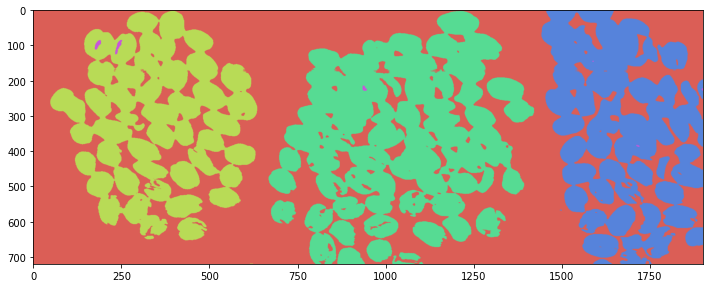

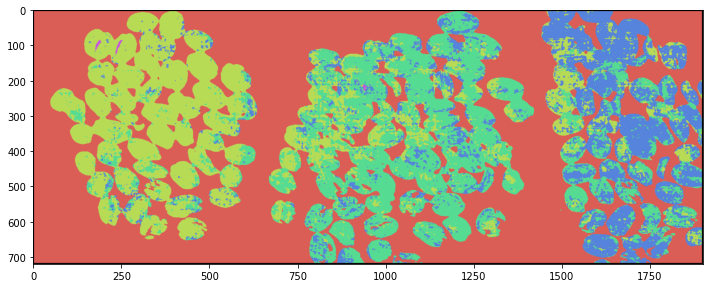

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(convert_to_color_(gt,palette=palette))

plt.figure(figsize=(12,12))
plt.imshow(predict_color)


### Смотрим метрики

In [18]:
print(score(gt.flatten(), predict.flatten()))

c:\users\firsov\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\firsov\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.98      0.98      0.98    686847
         2.0       0.87      0.41      0.56    197126
         3.0       0.62      0.77      0.68    287018
         4.0       0.58      0.63      0.60    196207
         5.0       0.50      0.90      0.64       802

    accuracy                           0.80   1368000
   macro avg       0.59      0.62      0.58   1368000
weighted avg       0.83      0.80      0.80   1368000



c:\users\firsov\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
